# The scipy.stats Python Library 

[Official Documentation](https://docs.scipy.org/doc/scipy/reference/reference/stats.html)
***

<center><img src="images/logo.svg" alt="Logo" width="300"></center>    

## Scipy
***

First released in 2001, SciPy is an open-source Python library used to solve scientific and mathematical problems. It is built on the NumPy extension and allows the user to manipulate and visualize data with a wide range of high-level commands [1]. This allows us to use mathematical/scientific functionality in a programming language. As the most complete scientific library in Python, SciPy contains modules for optimization, linear algebra, integration, interpolation, and other tasks common in science and engineering [2].Some benefits include high-level commands and classes for visualizing and manipulating data, powerful and interactive sessions with Python, and, web and database routines for parallel programming. It is also easy, fast and open-source [4].

SciPy contains various subpackages such as:

- constants - Physical and mathematical constants
- integrate - Integration and ordinary differential equation solvers
- interpolate - Interpolation and smoothing splines
- linalg - Linear algebra
- optimize - Optimization and root-finding routines
- special - Special functions
- stats - Statistical distributions and functions

More found at [SciPy introduction page](https://scipy.github.io/devdocs/tutorial/general.html). For the purposes of this assignment we will primarily concentrate on the scipy.stats model for use in statistical analysis. 

## Scipy.stats
***

The scipy.stats contains a large number of statistics, probability distributions functions. The list of statistics functions can be obtained by info(stats). It is mainly used for probabilistic distributions and statistical operations. There is a wide range of probability functions and the statistical functionality is expanding as the library is open-source.

There are functions for both continuous and discrete variables which can work with different types of distributions like the binomial, uniform, and continuous. We can also perform the T-test and determine the T-score [5]. 



## Hypothesis Testing
***


Hypothesis testing is an act in statistics whereby an analyst tests an assumption regarding a population parameter. The methodology employed by the analyst depends on the nature of the data used and the reason for the analysis.

Hypothesis testing is used to assess the plausibility of a hypothesis by using sample data. Such data may come from a larger population, or from a data-generating process.

Hypothesis testing types:

1. T Test
2. Z Test
3. ANOVA Test
4. Chi-Square Test

<center><img src="images/ChooseHT.png" alt="Choosing the Right Hypothesis Test" width="600"></center>

[blog.minitab.com](https://blog.minitab.com/en/understanding-statistics/what-statistical-hypothesis-test-should-i-use)




## Import necessary packages
***

In [160]:
import pandas as pd  # Pandas for dataframe.

import seaborn as sns # Seaborn for Plotting.

from scipy import stats

# Alternative statistics package.
import statsmodels.stats.weightstats as stat

import scipy.stats as ss # SciPy Stats

import numpy as np # Numpy for arrays 

import collections as co # Collections

import scipy.special as spec # SciPy Specials

import matplotlib.pyplot as plt

plt.style.use('ggplot')

## T-test
***

We perform the T-test to evaluate the difference between the mean (average) values of two arrays. We consider the value of T-Test as a significant difference in the two data sets.

### Critical values
The critical value is used to make a decision regarding the calculation of the t statistic from the samples.

If the probability of seeing such a t value given the hypothesis that there is no difference between the means is low, then data is suggesting that you should reject that hypothesis.

<center><img src="images/criticalRegion.png" alt="Critical Region" width="500"></center>



### Null and Alternative Hypothesis 

### Type I and II Errors

If we choose the wrong type of statistical test we are likely to commit either a Type 1 or a Type 2 error. A Type 1 error occurs if you reject the null hypothesis when it should have been accepted. A Type 2 error is when a false null hypothesis is accepted. Type 1 and Type 2 errors are opposites.

<center><img src="images/typeErrors.jpg" alt="Type I and II Errors" width="600"></center>



### Type I errors - False Positives

In [161]:
# Let's run 10000 t-tests where the means are equal.
# We should make the wrong decision (reject the hypothesis) (100 * critical) percent of the time.

trials = 10000
N = 100
m_a, m_b, s = 2.0, 2.0, 0.3
rejects = 0
critical = 0.05

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s, size=N)
    b = np.random.normal(loc=m_b, scale=s, size=N)
    if ss.ttest_ind(a, b)[1] <= critical:
        rejects = rejects + 1

typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}%")

5.18%


### Type II errors - False Negatives

In [162]:
trials = 10000
N = 100
m_a, m_b, s = 2.0, 2.1, 0.3
dont = 0

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s, size=N)
    b = np.random.normal(loc=m_b, scale=s, size=N)
    if ss.ttest_ind(a, b)[1] > 0.05:
        dont = dont + 1

typeii = 100.0 * (dont / trials)
print(f"{typeii:0.2f}%")

35.33%


### T-test vs ANOVA 
[Link to T-test vs ANOVA](https://www.raybiotech.com/learning-center/t-test-anova/#:~:text=The%20t%2Dtest%20is%20a,statistically%20different%20from%20each%20other)

The t-test is a method that determines whether two populations are statistically different from each other, whereas ANOVA determines whether three or more populations are statistically different from each other. Both of them look at the difference in means and the spread of the distributions (i.e., variance) across groups; however, the ways that they determine the statistical significance are different.

## ANOVA Test - Analysis of variance
***

https://www.edureka.co/blog/introduction-to-analysis-of-variance-with-ranova/

<img src="images/variances.png" alt="Compare Variances">

as above the shape of F- distribution always depends on degrees of freedom. https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476


Analysis of variance (ANOVA) was developed by the statistician Ronald Fisher  in 1918, it is a statistical technique that is used to check if the means of two or more groups are significantly different from each other. ANOVA checks the impact of one or more factors by comparing the means of different samples.

Like the t-test, ANOVA determines whether the differences between groups of data are statistically significant. It works by analysing the levels of variance within the groups through samples taken from each of them. [3](#References)

T-tests & ANOVA will provide the same results where only two samples are under consideration, however t-test would not be as reliable as an ANOVA test in cases where there are more than 2 samples. 

### Types of ANOVA Test

1. One-Way ANOVA

2. Two-Way ANOVA

3. N-Way ANOVA (MANOVA)

https://www.analyticsvidhya.com/blog/2020/06/introduction-anova-statistics-data-science-covid-python/
Types of ANOVA Tests
One-Way ANOVA: A one-way ANOVA has just one independent variable
For example, differences in Corona cases can be assessed by Country, and a Country can have 2, 20, or more different categories to compare
Two-Way ANOVA: A two-way ANOVA (also called factorial ANOVA) refers to an ANOVA using two independent variables
Expanding the example above, a two-way ANOVA can examine differences in Corona cases (the dependent variable) by Age group (independent variable 1) and Gender (independent variable 2). Two-way ANOVA can be used to examine the interaction between the two independent variables. Interactions indicate that differences are not uniform across all categories of the independent variables
For example, Old Age Group may have higher Corona cases overall compared to the Young Age group, but this difference could be greater (or less) in Asian countries compared to European countries
N-Way ANOVA: A researcher can also use more than two independent variables, and this is an n-way ANOVA (with n being the number of independent variables you have), aka MANOVA Test.
For example, potential differences in Corona cases can be examined by Country, Gender, Age group, Ethnicity, etc, simultaneously
An ANOVA will give you a single (univariate) f-value while a MANOVA will give you a multivariate F-value
 


https://www.reneshbedre.com/blog/anova.html
### How ANOVA works?Permalink
Check sample sizes: equal number of observation in each group
Calculate Mean Square for each group (MS) (SS of group/level-1); level-1 is a degrees of freedom (df) for a group
Calculate Mean Square error (MSE) (SS error/df of residuals)
Calculate F value (MS of group/MSE)
Calculate p value based on F value and degrees of freedom (df)


F value is inversely related to p value and higher F value (greater than F critical value) indicates a significant p value.

https://www.pythonfordatascience.org/anova-python/:

<img src="images/anova_latex.png" alt="ANOVA LaTeX">

https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php

#### Assumption 1

Assumption #1: Your dependent variable should be measured at the interval or ratio level (i.e., they are continuous). Examples of variables that meet this criterion include revision time (measured in hours), intelligence (measured using IQ score), exam performance (measured from 0 to 100), weight (measured in kg), and so forth. You can learn more about interval and ratio variables in our article: Types of Variable.

#### Assumption 2

Assumption #2: Your independent variable should consist of two or more categorical, independent groups. Typically, a one-way ANOVA is used when you have three or more categorical, independent groups, but it can be used for just two groups (but an independent-samples t-test is more commonly used for two groups). Example independent variables that meet this criterion include ethnicity (e.g., 3 groups: Caucasian, African American and Hispanic), physical activity level (e.g., 4 groups: sedentary, low, moderate and high), profession (e.g., 5 groups: surgeon, doctor, nurse, dentist, therapist), and so forth.

#### Assumption 3

Assumption #3: You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves. For example, there must be different participants in each group with no participant being in more than one group. This is more of a study design issue than something you can test for, but it is an important assumption of the one-way ANOVA. If your study fails this assumption, you will need to use another statistical test instead of the one-way ANOVA (e.g., a repeated measures design). If you are unsure whether your study meets this assumption, you can use our Statistical Test Selector, which is part of our enhanced guides.

#### Assumption 4

Assumption #4: There should be no significant outliers. Outliers are simply single data points within your data that do not follow the usual pattern (e.g., in a study of 100 students' IQ scores, where the mean score was 108 with only a small variation between students, one student had a score of 156, which is very unusual, and may even put her in the top 1% of IQ scores globally). The problem with outliers is that they can have a negative effect on the one-way ANOVA, reducing the validity of your results. Fortunately, when using SPSS Statistics to run a one-way ANOVA on your data, you can easily detect possible outliers. In our enhanced one-way ANOVA guide, we: (a) show you how to detect outliers using SPSS Statistics; and (b) discuss some of the options you have in order to deal with outliers. You can learn more about our enhanced one-way ANOVA guide on our Features: One-way ANOVA page.

#### Assumption 5

Assumption #5: Your dependent variable should be approximately normally distributed for each category of the independent variable. We talk about the one-way ANOVA only requiring approximately normal data because it is quite "robust" to violations of normality, meaning that assumption can be a little violated and still provide valid results. You can test for normality using the Shapiro-Wilk test of normality, which is easily tested for using SPSS Statistics. In addition to showing you how to do this in our enhanced one-way ANOVA guide, we also explain what you can do if your data fails this assumption (i.e., if it fails it more than a little bit). Again, you can learn more on our Features: One-way ANOVA page.

 The test rejects the hypothesis of normality when the p-value is less than or equal to 0.05

#### Assumption 6

Assumption #6: There needs to be homogeneity of variances. You can test this assumption in SPSS Statistics using Levene's test for homogeneity of variances. If your data fails this assumption, you will need to not only carry out a Welch ANOVA instead of a one-way ANOVA, which you can do using SPSS Statistics, but also use a different post hoc test. In our enhanced one-way ANOVA guide, we (a) show you how to perform Levene’s test for homogeneity of variances in SPSS Statistics, (b) explain some of the things you will need to consider when interpreting your data, and (c) present possible ways to continue with your analysis if your data fails to meet this assumption, including running a Welch ANOVA in SPSS Statistics instead of a one-way ANOVA, and a Games-Howell test instead of a Tukey post hoc test (learn more on our Features: One-way ANOVA page).

## Application
***

### Selection of Dataset

Consider a diet dataset (https://www.sheffield.ac.uk/mash/statistics/datasets).

<img src="images/diet.jpg" alt="Diet">


In [163]:
# Load the iris data set from a URL.
df = pd.read_csv("datasets/diet.csv")

In [164]:
# Have a look at the data.
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,1,0,22,159,58,1,54.2
1,2,0,46,192,60,1,54.0
2,3,0,55,170,64,1,63.3
3,4,0,33,171,64,1,61.1
4,5,0,50,170,65,1,62.2
...,...,...,...,...,...,...,...
71,74,1,35,183,83,3,80.2
72,75,1,49,177,84,3,79.9
73,76,1,28,164,85,3,79.7
74,77,1,40,167,87,3,77.8


In [165]:
# Have a look at the data.
df.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,1,0,22,159,58,1,54.2
1,2,0,46,192,60,1,54.0
2,3,0,55,170,64,1,63.3
3,4,0,33,171,64,1,61.1
4,5,0,50,170,65,1,62.2


In [166]:
# Summary statistics.
df.describe()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,39.868421,0.434211,39.223684,170.776316,72.289474,2.039474,68.343421
std,22.843434,0.498946,9.908379,11.419981,7.974653,0.823663,8.058938
min,1.000000,0.000000,16.000000,141.000000,58.000000,1.000000,53.000000
25%,19.750000,0.000000,32.500000,163.750000,66.000000,1.000000,61.950000
50%,40.500000,0.000000,39.000000,169.000000,72.000000,2.000000,68.950000
75%,59.250000,1.000000,47.250000,175.250000,78.000000,3.000000,73.675000
max,78.000000,1.000000,60.000000,201.000000,88.000000,3.000000,84.500000


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Person        76 non-null     int64  
 1   gender        76 non-null     int64  
 2   Age           76 non-null     int64  
 3   Height        76 non-null     int64  
 4   pre.weight    76 non-null     int64  
 5   Diet          76 non-null     int64  
 6   weight6weeks  76 non-null     float64
dtypes: float64(1), int64(6)
memory usage: 4.3 KB


In [168]:
X_diet = df.drop('Person', axis=1)
X_diet.shape

(76, 6)

In [169]:
y_diet = df['Person']
y_diet.shape

(76,)

In [170]:
df['weightDiff'] = df['pre.weight'] - df['weight6weeks']

### Visualise

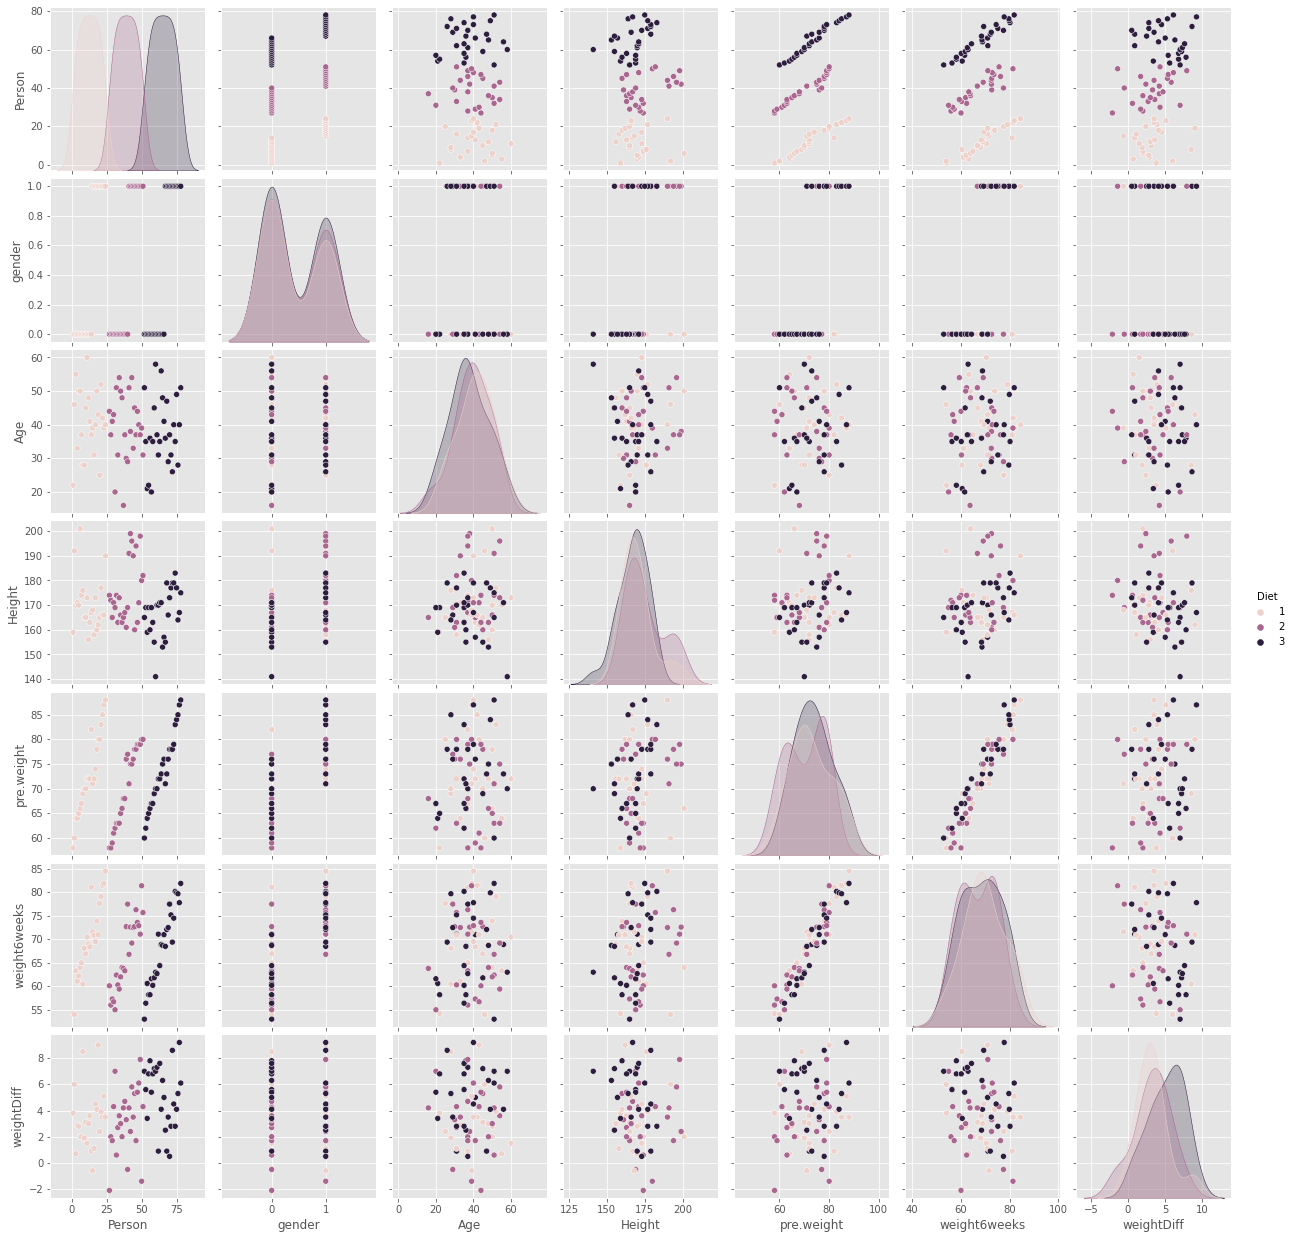

In [171]:
sns.pairplot(df, hue="Diet")
plt.show()

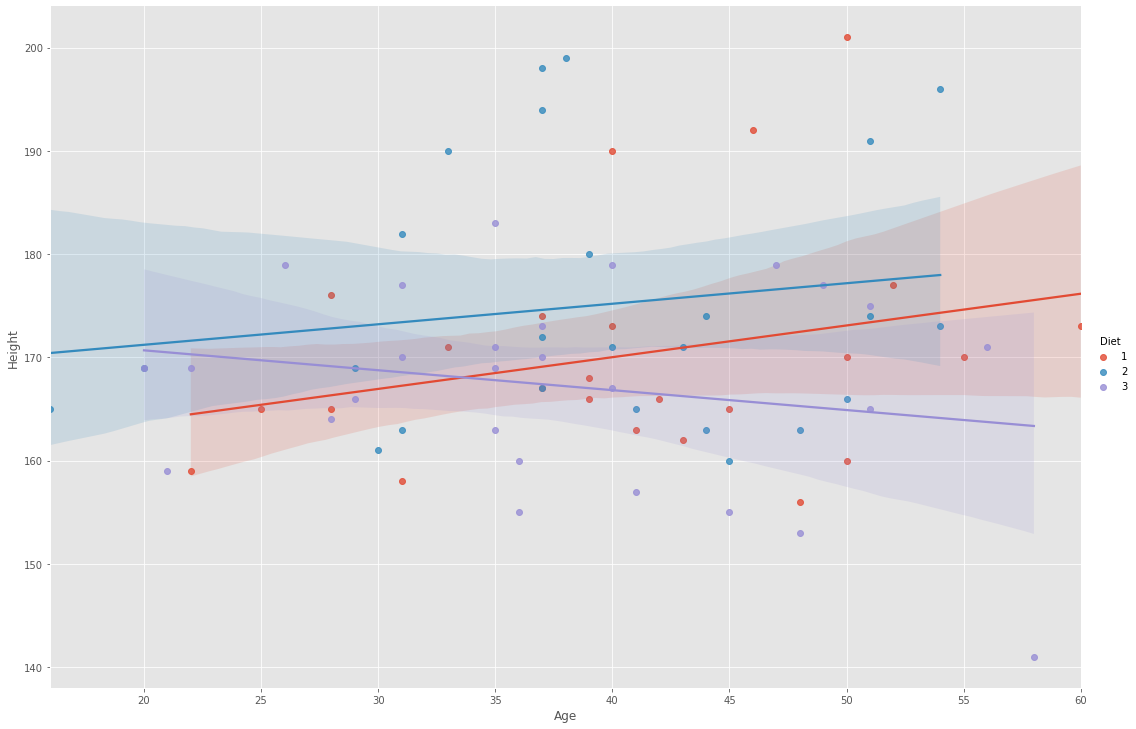

In [172]:
sns.lmplot(x="Age", y="Height", hue='Diet', data=df, fit_reg=True, height=10, aspect=1.5);

Scatter plots are a useful way to look at the variance of a data and are, typically, our first step in assessing homogeneity. We can illustrate with some golf data provided by ESPN. Here we are assessing the number of birdies players score versus the rank of the player (fig 1) and the number of events played (fig 2). For both figures I added the trend line which makes it easier to assess the variance (or spread of points). In figure 1 it appears that the dots are spread out fairly evenly across the line; this is what is meant by homogeneity of variance.

## Check ANOVA Assumptions
***


https://machinelearningmastery.com/feature-selection-with-numerical-input-data/
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

### Assumption 1: Dependent variable

In [173]:
# The dependent variable.
dependent = df['weightDiff']
dependent

0     3.8
1     6.0
2     0.7
3     2.9
4     2.8
     ... 
71    2.8
72    4.1
73    5.3
74    9.2
75    6.1
Name: weightDiff, Length: 76, dtype: float64

In [174]:
dependent.describe()

count    76.000000
mean      3.946053
std       2.505803
min      -2.100000
25%       2.300000
50%       3.700000
75%       5.650000
max       9.200000
Name: weightDiff, dtype: float64

### Assumption 2: Independent variable

In [175]:
# Independent variable.
independent = df['Diet']
independent

0     1
1     1
2     1
3     1
4     1
     ..
71    3
72    3
73    3
74    3
75    3
Name: Diet, Length: 76, dtype: int64

### Assumption 3: Independence of Observations

https://inspect-lb.org/statistical-tests/

There are 76 individual persons tested of varying age, weight and gender. 

### Assumption 4: Outliers

<AxesSubplot:xlabel='Diet', ylabel='weightDiff'>

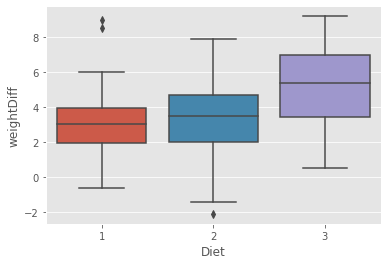

In [176]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x=independent, y=dependent)

In [177]:
df.loc[(df['weightDiff']>=8) & (df['Diet']< 2)]

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weightDiff
7,8,0,28,176,69,1,60.5,8.5
47,19,1,43,162,80,1,71.0,9.0


In [178]:
df.loc[(df['weightDiff']<=-2) & (df['Diet']<3)]

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weightDiff
14,27,0,44,174,58,2,60.1,-2.1


### Assumption 5: Normality

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

https://statistics.laerd.com/spss-tutorials/testing-for-normality-using-spss-statistics.php


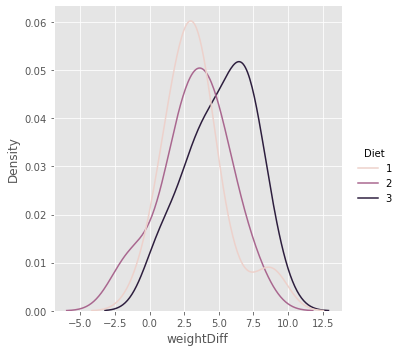

In [179]:
# KDEs of the three categories.
sns.displot(x=dependent, hue=independent, kind="kde")

We can see from the above plot that each of the plots are approximately normally distributed. The Type 2 diet seems to have the most conventional normal distribution. The Type 1 and Type 3 diet seem to have a couple of kinks in the distribution but these are not too severe for us to conclude that they are not normally distributed.

**Apply Shapiro Wilk Test**
The Shapiro Wilk test rejects the hypothesis of normality when the p-value is less than or equal to 0.05

In [180]:
# Shapiro Wilk Test - Diet Type 1

ss.shapiro(df['weightDiff'][df['Diet'] == 1]) 

ShapiroResult(statistic=0.9255314469337463, pvalue=0.07748671621084213)

In [181]:
# Shapiro Wilk Test - Diet Type 2

ss.shapiro(df['weightDiff'][df['Diet'] == 2]) 

ShapiroResult(statistic=0.9793620705604553, pvalue=0.8721737861633301)

In [182]:
# Shapiro Wilk Test - Diet Type 3

ss.shapiro(df['weightDiff'][df['Diet'] == 3]) 

ShapiroResult(statistic=0.9601252675056458, pvalue=0.37203603982925415)

Each Diet has past the normalisation test. Diet 1 is the worst performing evidenced by additional curving seen on graph

### Assumption 6: Homogeneity of Variances

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php


We can see from the above plot that each of the plots are approximately normally distributed. The Type 2 diet seems to have the most conventional normal distribution. The Type 1 and Type 3 diet seem to have a couple of kinks in the distribution but these are not too severe for us to conclude that they are not normally distributed.

**Apply Levene Test**
The Shapiro Wilk test rejects the hypothesis of normality when the p-value is less than or equal to 0.05

the population variances of the dependent variable must equal for all groups. 

Variance represents the average squared deviations between a group of observations and their respective mean 

common assumption across statistical analysis

https://www.spss-tutorials.com/levenes-test-in-spss/

In [183]:
# Splitting into DataFrames for each of the diets.
diet1 = df[df['Diet'] == 1]
diet2 = df[df['Diet'] == 2]
diet3 = df[df['Diet'] == 3]

# Calculate the p-value from Levene's test
pvalue = stats.levene(diet1['weightDiff'], diet2['weightDiff'], diet3['weightDiff'])[1]

# Print the p-value
print(f"Levene's test P-value: {pvalue}")

Levene's test P-value: 0.6312856401117967


As the p-value is greater than 0.05, the Diet grouping has past the homogenuity of variance test. 

## Hypothesis Test using ANOVA (Analysis of Variance)
***

### One-Way ANOVA 

In [184]:
# Calculate the f_statistic and p_value for the ANOVA test
f_statistic, pvalue = stats.f_oneway(diet1['weightDiff'], diet2['weightDiff'], diet3['weightDiff'])

# Print the f_statistic and pvalue.
print(f"ANOVA F-statistic: {f_statistic}")
print(f"ANOVA p-value: {pvalue}\n")

ANOVA F-statistic: 5.383104474859926
ANOVA p-value: 0.006595853108669741



The one-way ANOVA reports a P value <0.05 (less than the significance level), therefore the null hypothesis that "there is no statistically significant difference between the group means" is rejected and the alternative hypothesis that "there is at least two of the group means that are statistically significantly different from each other" is accepted.

To Conclude, as the null hypothesis is rejected that means variance exists between the groups which state that there is an impact of the guardian on student final score. So we will include this feature for model training.

### Post Hoc Tests

From ANOVA analysis, we know that treatment differences are statistically significant, but ANOVA does not tell which treatments are significantly different from each other. To know the pairs of significant different treatments, we will perform multiple pairwise comparison (post hoc comparison) analysis for all unplanned comparison using Tukey’s honestly significantly differenced (HSD) test. https://www.reneshbedre.com/blog/anova.html

The t-test for independent samples tests whether or not those two means are significantly different from each other, provided they were the only two samples taken. Post-hoc comparison techniques, on the other hand, specifically take into account the fact that more than two samples were taken. When the ANOVA is significant, post hoc tests are used to see differences between specific groups. post hoc tests control the family-wise error rate (inflated type I error rate) due to multiple comparisons. t-test does not control the inflated type I error rate.

As the ANOVA result does not identify which particular differences between pairs of means are significant, A post hoc test can be used to explore the differences between group means. 

Post hoc translates to “after the event” in Latin and the tests are conducted after an ANOVA test.

There are many different post hoc tests that have been developed, and most of them will give us similar answers.

Some common post hoc tests include:

- Tukey’s Honest Significant Difference 
- Bonferroni Procedure
- Scheffé’s Method
- Duncan’s new multiple range test (MRT)
- Fisher’s Least Significant Difference (LSD)

### Tukey’s Honest Significant Difference (HSD)


The Tukey test was developed by John Tukey,  the test compares the differences between means of values rather than comparing pairs of values. The value of the Tukey test is given by taking the absolute value of the difference between pairs of means and dividing it by the standard error of the mean (SE) as determined by a one-way ANOVA test. The SE is in turn the square root of (variance divided by sample size). [4](#References)

The purpose of Tukey’s test is to figure out which groups in your sample differ. It uses the “Honest Significant Difference,” a number that represents the distance between groups, to compare every mean with every other mean.## References

[1] https://docs.scipy.org/doc/scipy/reference/reference/stats.html

In [185]:
# Import the Tukey HSD test from statsmodels
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# endog is the dependent variable (weightChange).
# groups is the independent variable (Diet).
# alpha is the p-value threshold. In this case anything below 0.05 will reject the null hypothesis.
tukey = pairwise_tukeyhsd(endog=df['weightDiff'],
                          groups=df['Diet'],
                          alpha=0.05)

# Print the Tukey table
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   -0.032    0.9 -1.6531 1.5891  False
     1      3   1.8481 0.0188  0.2567 3.4396   True
     2      3   1.8801 0.0152  0.3057 3.4546   True
---------------------------------------------------


Above results from Tukey’s HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis (p < 0.05) and indicates statistical significant differences. https://www.reneshbedre.com/blog/anova.html







As we look at this table, the main value we're focusing on is the p-adj value, as this is the adjusted p-value. If this is below 0.05, then we can reject the null hypothesis that all groups are the same. Fortunately, the table also explicitly tells us this in the final column, "reject". 

## Conclusion
***

From the above table we can see that diets 1 and 3 are significantly different, and diets 2 and 3 are significantly different. We previously saw that diet 3 generally had larger weightChange values, and had the larger average weightChange, and so we can conclude that that increase in weightChange for diet 3 was statistically significant.

That diet dataset is a popular dataset for teaching ANOVA as it passes all of the assumptions quite neatly and requires very little cleaning or pre-processing. Unfortunately we're unlikely to encounter such data in the real world as data is often messy, is missing values and doesn't always pass all six assumptions. In order to demonstrate this, I will now perform another ANOVA analysis on a dataset which is closer to what we are likely to encounter in the real world.


## References
***
[1] https://www.edureka.co/blog/scipy-tutorial/

[2] https://scipy.github.io/devdocs/tutorial/general.html

[3] https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

[4] https://data-flair.training/blogs/scipy-tutorial/

[5] https://data-flair.training/blogs/scipy-statistical-functions/


***
## End